In [393]:
# Findings: Reading the concrete.csv into Excel sheet of the data using Filters

# 1. slag, ash, superplastic have zeroes
# Other than that there are no negative values or a ? or a blank entry
# Hence no missing values

In [394]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [395]:
import numpy as np
import pandas as pd

import seaborn as sns

In [396]:
concrete_df = pd.read_csv("concrete.csv")

In [397]:
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### 1. Deliverable -1 (Exploratory data quality report reflecting the following)
a. Univariate analysis

i. Univariate analysis – data types and description of the
independent attributes which should include (name,
meaning, range of values observed, central values (mean and
median), standard deviation and quartiles, analysis of the
body of distributions / tails, missing values, outliers

c. Strategies to address the different data challenges such as data
pollution, outliers and missing values

In [398]:
df_shape = concrete_df.shape

In [399]:
print("No of Rows are ", df_shape[0], ":  No of Columns are ", df_shape[1] )

No of Rows are  1030 :  No of Columns are  9


In [400]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [401]:
# Findings: No missing values
concrete_df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [402]:
concrete_df.isna().apply(pd.value_counts)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
False,1030,1030,1030,1030,1030,1030,1030,1030,1030


In [403]:
concrete_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Findings from Describe()

* Independent Variables *

1. Cement - Mean-Median are almost same, does not show skewed data.
2. slag - appears highly skewed with big difference in the mean and median(50%), shows presence of zeroes
3. ash - Highly skewed with big difference in mean-median plus presence of zeroes with min, 25%, 50% 
4. water - looks okay, with almost similar mean-median
5. superplastic - even though presence of zeroes, the mean-median values converge
6. coarseagg - almost similar mean median , data not skewed, no zero values in this column
7. fineagg - distribution looks uniform, with similar mean-median
8. age - Distribution is skewed with big difference in the central values mean and median

* Target Variable *
9. strength - Pairplot will show how different independent variables are interacting with Target Variable.


### b. Multivariate analysis
i. Bi-variate analysis between the predictor variables and
between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of
relation if any. Presence of leverage points. Visualize the
analysis using boxplots and pair plots, histograms or density
curves. Select the most appropriate attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCC5582DD8>,
      dtype=object)

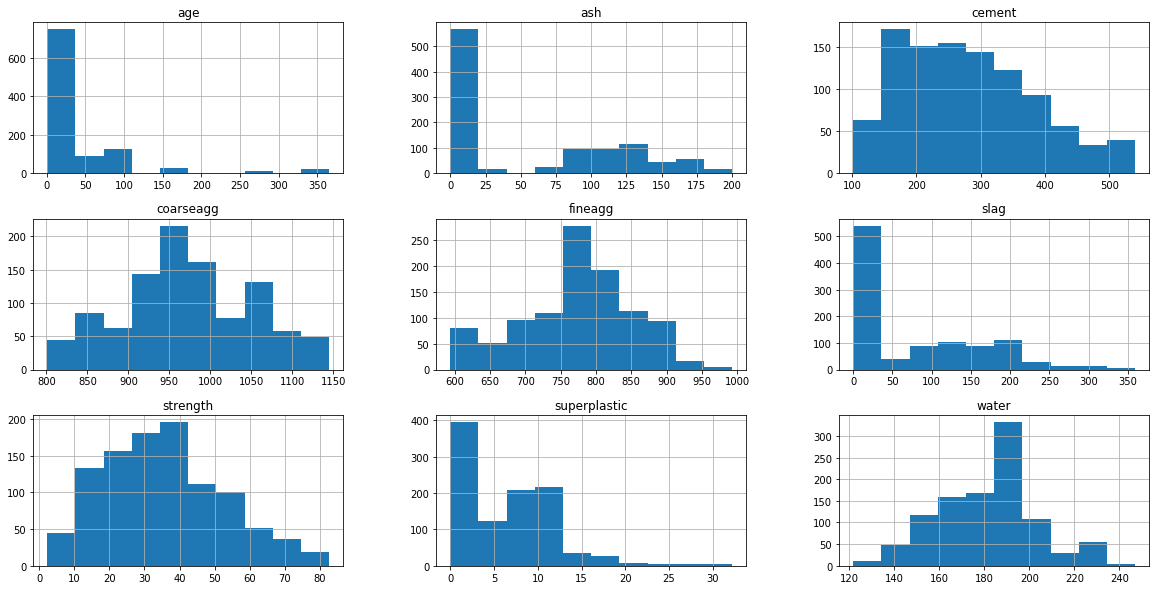

In [404]:
concrete_df.hist(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCC53855C0>,
      dtype=object)

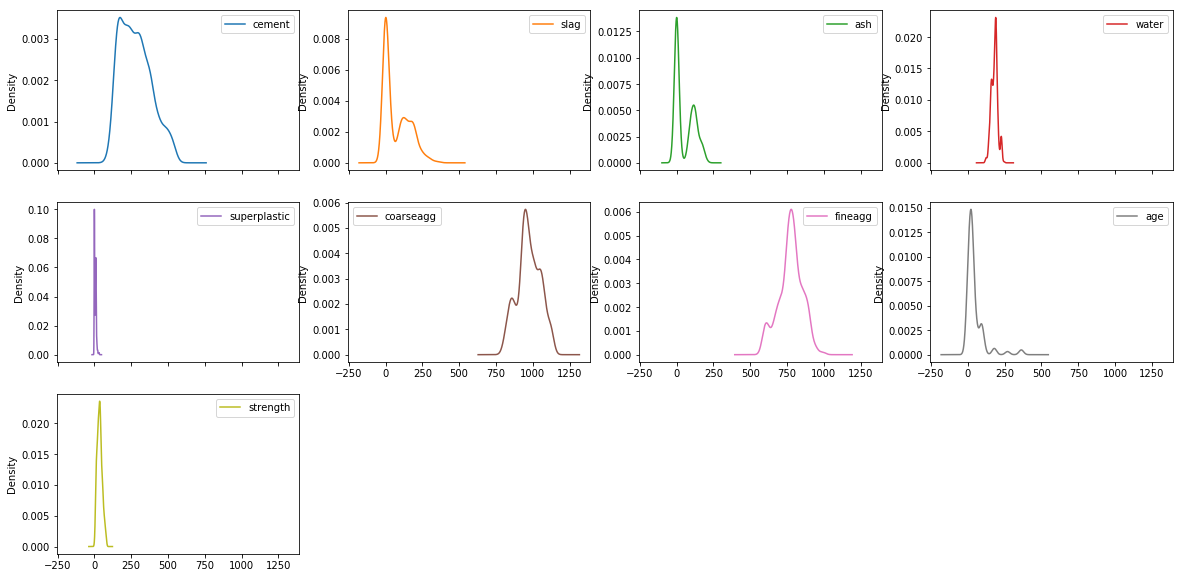

In [405]:
# Same can be visible at diagonal of the pairplot
concrete_df.plot(kind='density', subplots=True, layout=(3,4) , figsize=(20,10))

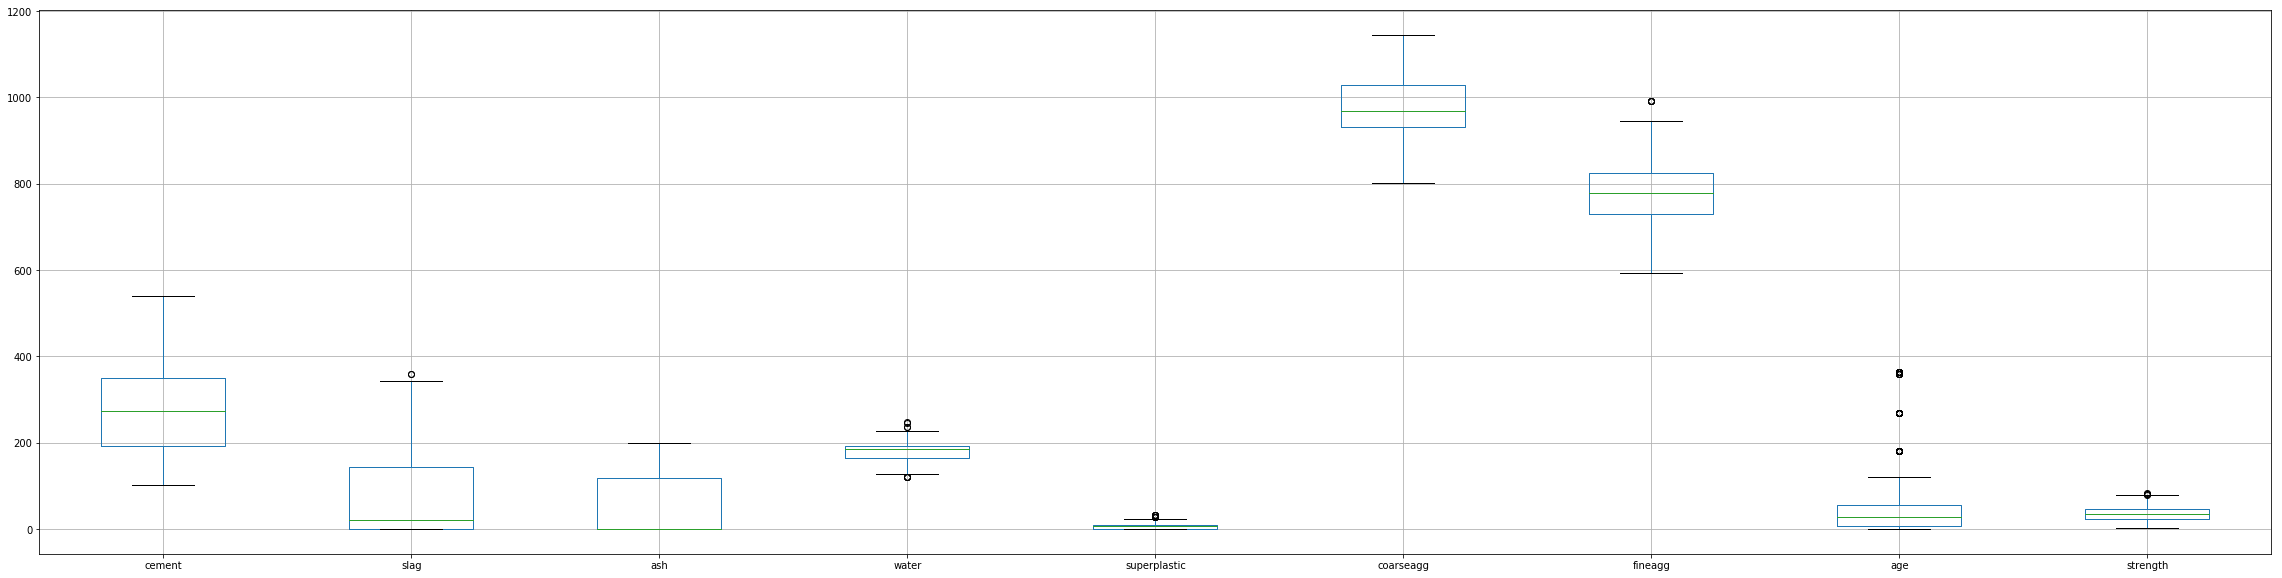

In [406]:
concrete_df.boxplot(figsize=(40,10))

### Findings  (Boxplot)
Shows presence of outliers and skewness for various independent variables - 

1. Outliers - slag, water, superplastic, fineagg, quite a lot in age
2. Higly Skwed  - slag, ash, age
3. Presence of Zeroes - slag, ash, superplastic, age (1 as min value)
4. Quartile info
Cement : Hardeep_TODO


#### Question for Business/SME : Should we treat the zeroes in the above columns ? slag, ash, superplastic ? Are the zeroes a good data to keep and are indication of one of the combinations/mixture without these materials ?

In [407]:
concrete_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


### Findings on Correlation

None of the independent variables have a strong linear correlation to each other or to the target variable.
Superplastic and Water share negative correlation.

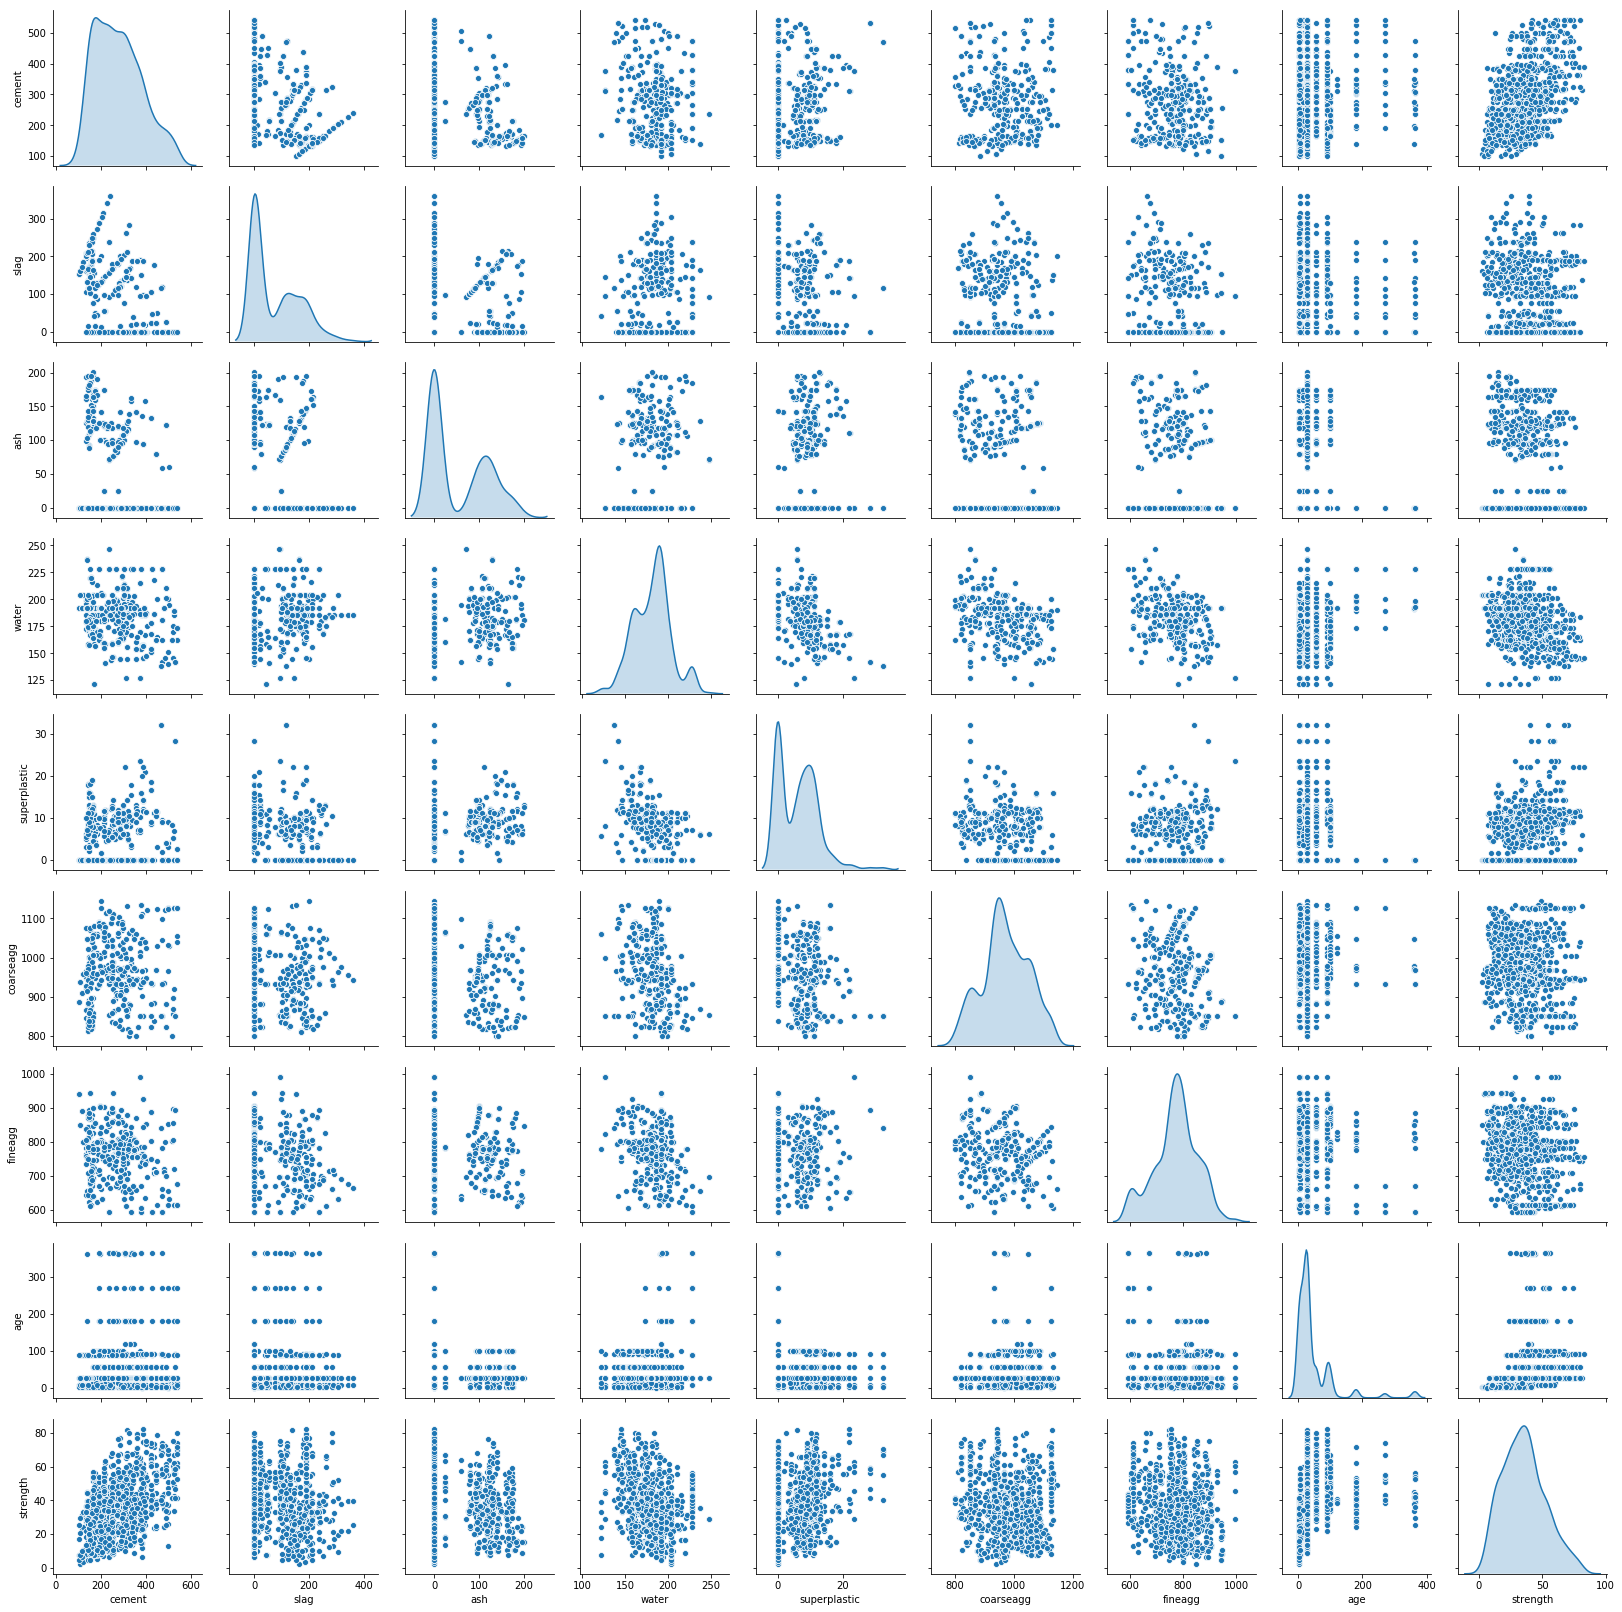

In [408]:
sns.pairplot(concrete_df, diag_kind='kde')

### Findings from the Pairplot

Presence of Multiple Gaussians
From diagonal plots we can see: 
slag has 2 peaks, ash has 2 peaks, water has 3 peaks, superplastic has 2 peaks,coarseagg has 2 clear peaks, fineagg has 2 peaks, age has 2 major peaks and 3 small peaks
It seems like we should try with 5x3 no of clusters for the elbow plot
From Bivariate plots we can see:
cement and strength have linear relationship

### 2. Deliverable -2 (Feature Engineering techniques)

a. Identify opportunities (if any) to create a composite feature, drop a feature

b. Decide on complexity of the model, should it be simple linear
mode in terms of parameters or would a quadratic or higher degree
help

In [409]:
# Lets scale the variables
from scipy.stats import zscore

concrete_df_z = concrete_df.apply(zscore)

In [410]:
y_scaled_df = concrete_df_z[['strength']]
X_scaled_df = concrete_df_z.drop("strength" , axis=1)

print(X_scaled_df.info())
print(y_scaled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
dtypes: float64(8)
memory usage: 64.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 1 columns):
strength    1030 non-null float64
dtypes: float64(1)
memory usage: 8.1 KB
None


In [411]:
# Lets do PCA to remove the noise and throwaway less useful components if any. To create composite features and see if we get better
# results
# Lets transform input features into Principal Components

from sklearn.decomposition import PCA
covMatrix = np.cov(X_scaled_df, rowvar=False)
print(covMatrix)
print(covMatrix.shape)



[[ 1.00097182 -0.27548337 -0.39785361 -0.08166604  0.09247596 -0.10945526
  -0.22293429  0.08202566]
 [-0.27548337  1.00097182 -0.32389436  0.10735626  0.04331247 -0.28427461
  -0.28187634 -0.04428902]
 [-0.39785361 -0.32389436  1.00097182 -0.25723376  0.37787001 -0.00997051
   0.07918537 -0.15452054]
 [-0.08166604  0.10735626 -0.25723376  1.00097182 -0.65817191 -0.18247076
  -0.45109913  0.27788802]
 [ 0.09247596  0.04331247  0.37787001 -0.65817191  1.00097182 -0.26625765
   0.22290765 -0.1928873 ]
 [-0.10945526 -0.28427461 -0.00997051 -0.18247076 -0.26625765  1.00097182
  -0.17865441 -0.00301881]
 [-0.22293429 -0.28187634  0.07918537 -0.45109913  0.22290765 -0.17865441
   1.00097182 -0.1562464 ]
 [ 0.08202566 -0.04428902 -0.15452054  0.27788802 -0.1928873  -0.00301881
  -0.1562464   1.00097182]]
(8, 8)


In [412]:
pca = PCA(n_components=8)
pca.fit(X_scaled_df)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [413]:
print("Eigen Values: ", pca.explained_variance_)

Eigen Values:  [2.2823152  1.41745097 1.34138135 1.01514445 0.95243269 0.7909634
 0.17801452 0.03007197]


In [414]:
print("% of variation explained by each Eigen Vector : \n", pca.explained_variance_ratio_)

% of variation explained by each Eigen Vector : 
 [0.28501242 0.17700935 0.16750988 0.12676986 0.1189385  0.09877443
 0.02223021 0.00375535]


[Text(0, 0.5, '% of Variation Explained'), Text(0.5, 0, 'Eigen Values')]

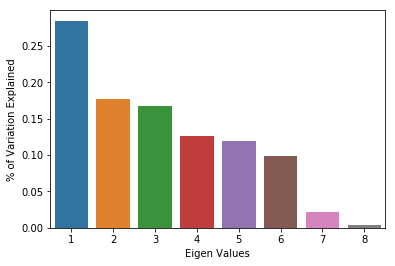

In [415]:
vr_plt = sns.barplot(x=list(range(1,9)), y=pca.explained_variance_ratio_)
vr_plt.set(xlabel='Eigen Values', ylabel='% of Variation Explained' )

[Text(0, 0.5, 'Cummulative Sum of Variation Explained %'),
 Text(0.5, 0, 'Eigen Values')]

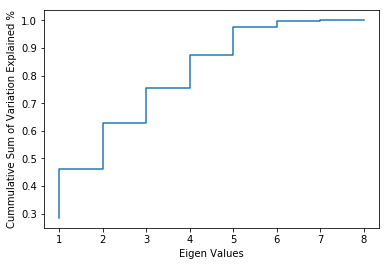

In [416]:
ln_plt = sns.lineplot(list(range(1,9)), np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
ln_plt.set(xlabel='Eigen Values', ylabel='Cummulative Sum of Variation Explained %' )

In [417]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28501242, 0.46202177, 0.62953165, 0.75630151, 0.87524001,
       0.97401444, 0.99624465, 1.        ])

In [418]:
pca6 = PCA(n_components=6)
pca6.fit(X_scaled_df)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(X_scaled_df)
Xpca6.shape

[0.28501242 0.17700935 0.16750988 0.12676986 0.1189385  0.09877443]


(1030, 6)

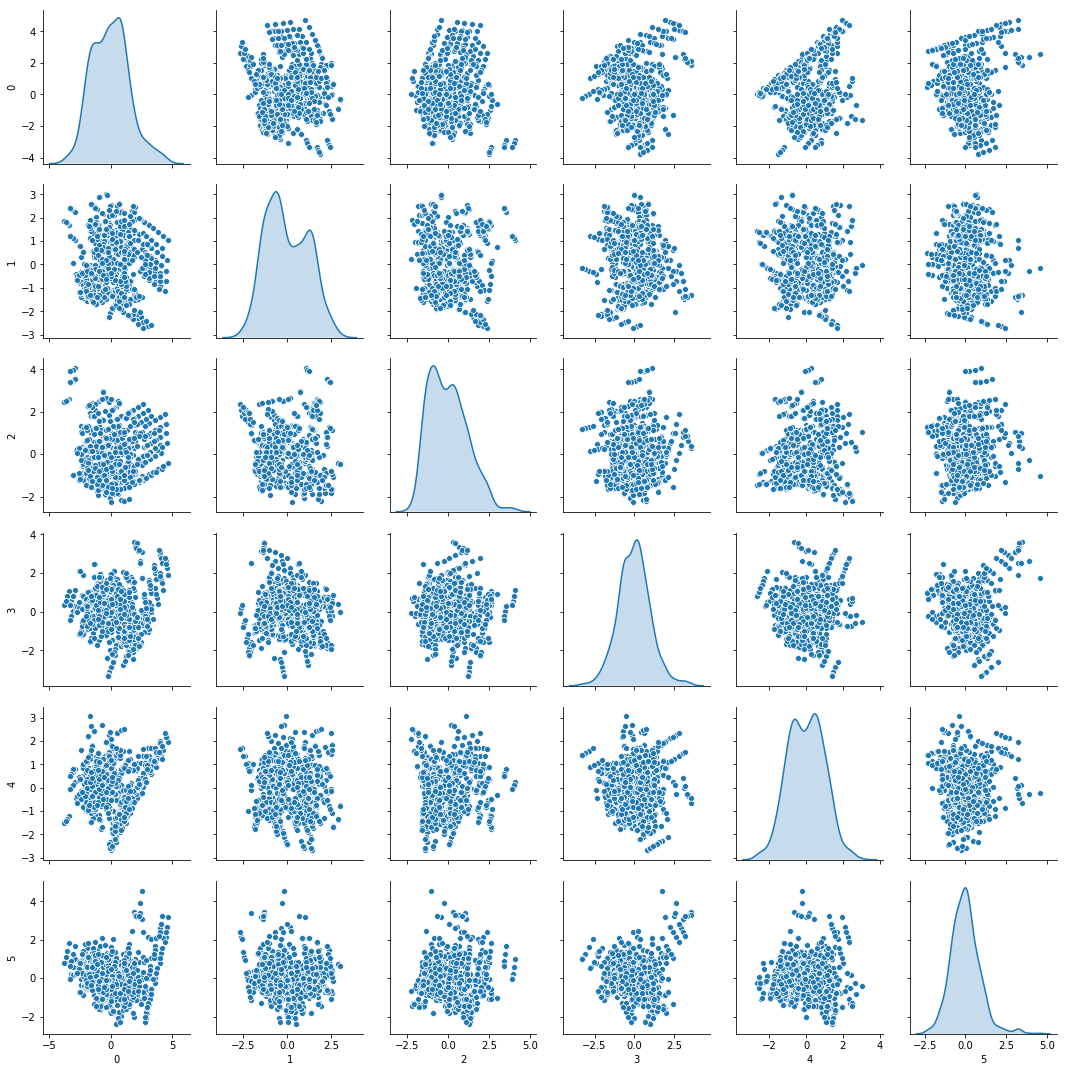

In [419]:
sns.pairplot(pd.DataFrame(Xpca6), diag_kind='kde')

### 3. Deliverable -3 (create the model )
a. Obtain feature importance for the individual features using
multiple methods and present your findings
4.

In [420]:
# split Train and Test data

from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_scaled_df, test_size=0.3, random_state=1)


### Linear Regression Model


******** LINEAR REGRESSION *******

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Root Mean Squared Error :  0.618177114503482

Coef for feature importances:  [[ 0.79170803  0.56206087  0.34747677 -0.13186138  0.13449877  0.11183689
   0.1737008   0.41759098]]

Train Score:  0.6031487540630229
Test Score:  0.6339136715208274

Cross Validation Score - RMSE:  0.6215888871870352


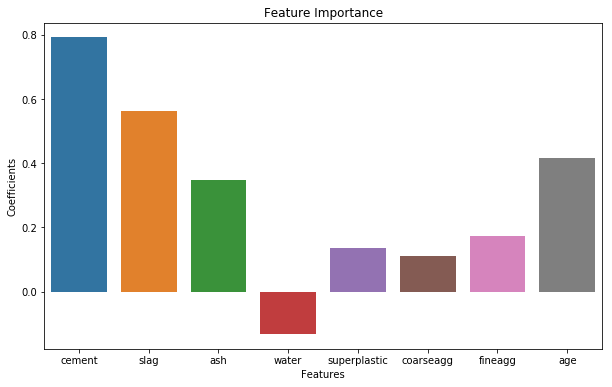

In [421]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("\n******** LINEAR REGRESSION *******\n")
print(lr_model)
print("\nRoot Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nCoef for feature importances: ", lr_model.coef_)
plt.figure(figsize=(10,6))
plt.ylabel("Coefficients")
plt.xlabel("Features")
plt.title('Feature Importance')
sns.barplot(x=X_train.columns, y=lr_model.coef_.ravel())

print("\nTrain Score: ", lr_model.score(X_train, y_train))
print("Test Score: ", lr_model.score(X_test, y_test))


lr_model_cv = LinearRegression()
kfold = model_selection.KFold(n_splits=20, random_state=1)
cross_scores = model_selection.cross_val_score(lr_model_cv, X_scaled_df, y_scaled_df, cv=kfold, scoring='neg_mean_squared_error')
cross_scores_corrected = np.sqrt(-1 * cross_scores) 
print("\nCross Validation Score - RMSE: ", cross_scores_corrected.mean())



### Regularized Linear Regression Models: Ridge & Lasso


******** RIDGE - Regularized LINEAR REGRESSION *******

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Root Mean Squared Error:  0.618076055719737

Coef for feature importances:  [[ 0.79170803  0.56206087  0.34747677 -0.13186138  0.13449877  0.11183689
   0.1737008   0.41759098]]

Train Score:  0.603144790939098
Test Score:  0.6340333563625518

Cross Validation Score:  0.6216050272543041


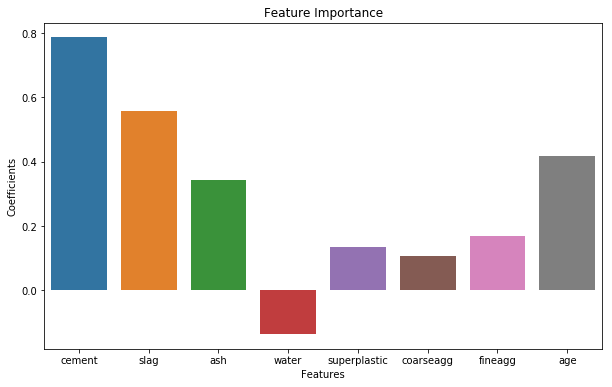

In [422]:
# Lets create a Regularized Ridge and Lasso model and check the coefficients
# Lasso gives zero coefficients in which case that particular feature can be dropped !
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=0.3)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
print("\n******** RIDGE - Regularized LINEAR REGRESSION *******\n")
print(ridge_model)
print("\nRoot Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nCoef for feature importances: ", lr_model.coef_)
plt.figure(figsize=(10,6))
plt.ylabel("Coefficients")
plt.xlabel("Features")
plt.title('Feature Importance')
sns.barplot(x=X_train.columns, y=ridge_model.coef_.ravel())
print("\nTrain Score: ", ridge_model.score(X_train, y_train))
print("Test Score: ", ridge_model.score(X_test, y_test))

# Reinstantiating the model, so as to have a cross validation that hasnt already seen or been fitted into the sample data
ridge_model_cv = Ridge()
kfold = model_selection.KFold(n_splits=20, random_state=1)
cross_scores = model_selection.cross_val_score(ridge_model_cv, X_scaled_df, y_scaled_df, cv=kfold, scoring='neg_mean_squared_error')
cross_scores_corrected = np.sqrt(-1 * cross_scores) 
print("\nCross Validation Score: ", cross_scores_corrected.mean())




******** LASSO Regularized LINEAR REGRESSION *******

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Root Mean Squared Error :  0.7089073507474938

Coef for feature importances:  [ 0.39456594  0.14777481  0.         -0.11823668  0.19361099 -0.
 -0.          0.2543608 ]

Train Score:  0.5215627623725142
Test Score:  0.51856614888699

Cross Validation Score - RMSE:  0.9972928497438056


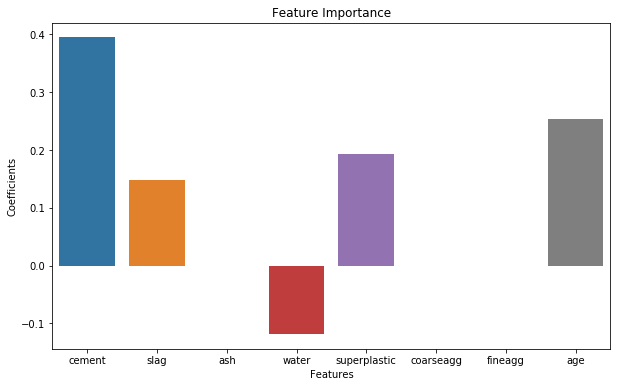

In [423]:
from sklearn.linear_model import Ridge, Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
print("\n******** LASSO Regularized LINEAR REGRESSION *******\n")
print(lasso_model)
print("\nRoot Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nCoef for feature importances: ", lasso_model.coef_)
plt.figure(figsize=(10,6))
plt.ylabel("Coefficients")
plt.xlabel("Features")
plt.title('Feature Importance')
sns.barplot(x=X_train.columns, y=lasso_model.coef_.ravel())
print("\nTrain Score: ", lasso_model.score(X_train, y_train))
print("Test Score: ", lasso_model.score(X_test, y_test))
      

lasso_model_cv = Lasso()
kfold = model_selection.KFold(n_splits=20, random_state=1)
cross_scores = model_selection.cross_val_score(lasso_model_cv, X_scaled_df, y_scaled_df, cv=kfold, scoring='neg_mean_squared_error')
cross_scores_corrected = np.sqrt(-1 * cross_scores) 
print("\nCross Validation Score - RMSE: ", cross_scores_corrected.mean())



### Findings:
As per Lasso we can drop 3 features where the coefficient is zero, ash, coarse aggregate and fine aggregate. However by doing so performance drops.

### KNN Regression

In [424]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("\n******** KNN Regression *******\n")
print(knn_model)
print("\nRoot Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))

print("\nTrain Score: ", knn_model.score(X_train, y_train))
print("Test Score: ", knn_model.score(X_test, y_test))
      

knn_model_cv = KNeighborsRegressor()
kfold = model_selection.KFold(n_splits=20, random_state=1)
cross_scores = model_selection.cross_val_score(knn_model_cv, X_scaled_df, y_scaled_df, cv=kfold, scoring='neg_mean_squared_error')
#print("Cross Validation Scores......", cross_scores)
cross_scores_corrected = np.sqrt(-1 * cross_scores) 
print("\nCross Validation Score - RMSE: ", cross_scores_corrected.mean())



******** KNN Regression *******

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

Root Mean Squared Error :  0.5677554866691427

Train Score:  0.7973432972703786
Test Score:  0.6911978296376005

Cross Validation Score - RMSE:  0.5163695339104882


### Decision Tree Regression


******** DECISION TREE REGRESSION *******

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

Root Mean Squared Error :  0.4055784778536906

Coef for feature importances:  [0.34884449 0.09608711 0.01259068 0.12237296 0.01940155 0.03141961
 0.03568337 0.33360023]

Train Score:  0.9948592395522299
Test Score:  0.8424176886314374

Cross Validation Score - RMSE:  0.3545872262975113


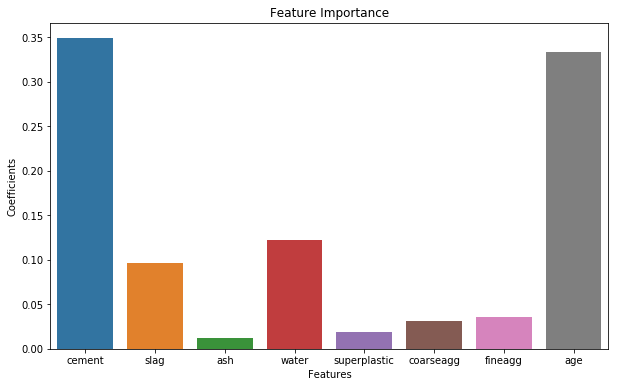

In [425]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(criterion = 'mse', random_state=1)
tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
print("\n******** DECISION TREE REGRESSION *******\n")
print(tree_model)
print("\nRoot Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nCoef for feature importances: ", tree_model.feature_importances_)
plt.figure(figsize=(10,6))
plt.ylabel("Coefficients")
plt.xlabel("Features")
plt.title('Feature Importance')
sns.barplot(x=X_train.columns, y=tree_model.feature_importances_)
print("\nTrain Score: ", tree_model.score(X_train, y_train))
print("Test Score: ", tree_model.score(X_test, y_test))
      

tree_model_cv = DecisionTreeRegressor(criterion = 'mse', random_state=1)
kfold = model_selection.KFold(n_splits=20, random_state=1)
cross_scores = model_selection.cross_val_score(tree_model_cv, X_scaled_df, y_scaled_df, cv=kfold, scoring='neg_mean_squared_error')
cross_scores_corrected = np.sqrt(-1 * cross_scores) 
print("\nCross Validation Score - RMSE: ", cross_scores_corrected.mean())


### Random Forest Regression


******** Random Forest REGRESSION *******

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Root Mean Squared Error :  0.3189859455978351

Coef for feature importances:  [0.32025848 0.08228636 0.02590668 0.10737655 0.05748584 0.02663631
 0.03561844 0.34443135]

Train Score:  0.9746540247615397
Test Score:  0.9025233126692689

Cross Validation Score - RMSE:  0.2876533407757054


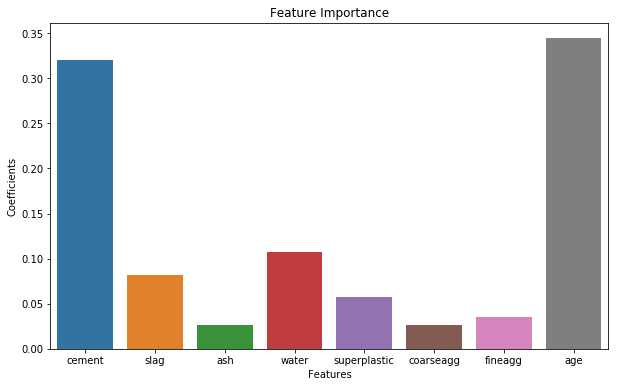

In [426]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("\n******** Random Forest REGRESSION *******\n")
print(rf_model)
print("\nRoot Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nCoef for feature importances: ", rf_model.feature_importances_)
plt.figure(figsize=(10,6))
plt.ylabel("Coefficients")
plt.xlabel("Features")
plt.title('Feature Importance')
sns.barplot(x=X_train.columns, y=rf_model.feature_importances_)
print("\nTrain Score: ", rf_model.score(X_train, y_train))
print("Test Score: ", rf_model.score(X_test, y_test))
      

rf_model_cv = RandomForestRegressor()
kfold = model_selection.KFold(n_splits=20, random_state=1)
cross_scores = model_selection.cross_val_score(rf_model_cv, X_scaled_df, y_scaled_df, cv=kfold, scoring='neg_mean_squared_error')
cross_scores_corrected = np.sqrt(-1 * cross_scores) 
print("\nCross Validation Score - RMSE: ", cross_scores_corrected.mean())



### AdaBoost Regressor


******** AdaBoost REGRESSION *******

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

Root Mean Squared Error :  0.49239124880827967

Coef for feature importances:  [0.30875738 0.06842724 0.0152649  0.16538644 0.05243375 0.02014066
 0.05072016 0.31886945]

Train Score:  0.8193763384960261
Test Score:  0.7677379174790818

Cross Validation Score - RMSE:  0.454954725776063


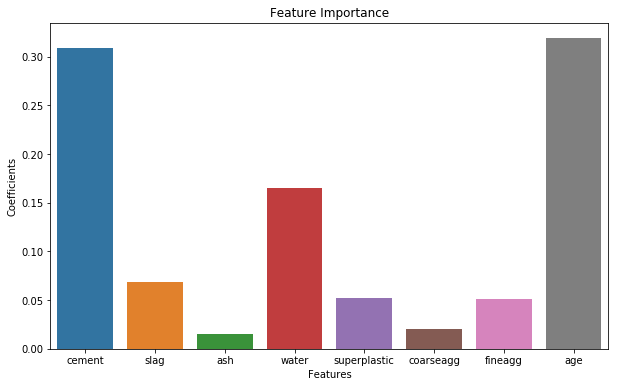

In [427]:
from sklearn.ensemble import AdaBoostRegressor

adb_model = AdaBoostRegressor()
adb_model.fit(X_train, y_train)
y_pred = adb_model.predict(X_test)
print("\n******** AdaBoost REGRESSION *******\n")
print(adb_model)
print("\nRoot Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nCoef for feature importances: ", adb_model.feature_importances_)
plt.figure(figsize=(10,6))
plt.ylabel("Coefficients")
plt.xlabel("Features")
plt.title('Feature Importance')
sns.barplot(x=X_train.columns, y=adb_model.feature_importances_)
print("\nTrain Score: ", adb_model.score(X_train, y_train))
print("Test Score: ", adb_model.score(X_test, y_test))
      

adb_model_cv = AdaBoostRegressor()
kfold = model_selection.KFold(n_splits=20, random_state=1)
cross_scores = model_selection.cross_val_score(adb_model_cv, X_scaled_df, y_scaled_df, cv=kfold, scoring='neg_mean_squared_error')
cross_scores_corrected = np.sqrt(-1 * cross_scores) 
print("\nCross Validation Score - RMSE: ", cross_scores_corrected.mean())





### GradientBoosting Regressor


******** Gradient Boosting REGRESSION *******

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Root Mean Squared Error :  0.3172723971786145

Coef for feature importances:  [0.31525308 0.07070063 0.01752488 0.11339742 0.06709573 0.00992358
 0.0328531  0.37325159]

Train Score:  0.9503239654196514
Test Score:  0.9035677623824756

Cross Validation Score - RMSE:  0.2966821930410992


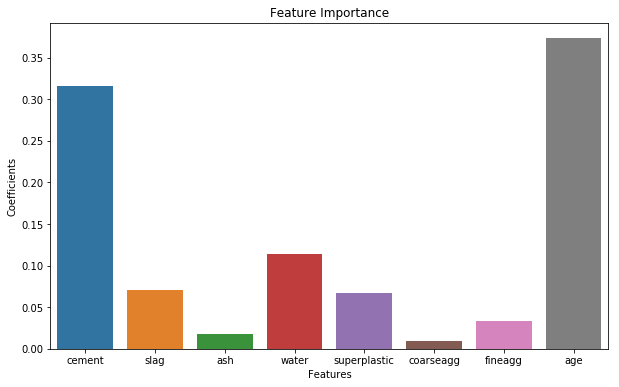

In [428]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor() # n_estimators=150
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
print("\n******** Gradient Boosting REGRESSION *******\n")
print(gb_model)
print("\nRoot Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nCoef for feature importances: ", gb_model.feature_importances_)
plt.figure(figsize=(10,6))
plt.ylabel("Coefficients")
plt.xlabel("Features")
plt.title('Feature Importance')
sns.barplot(x=X_train.columns, y=gb_model.feature_importances_)
print("\nTrain Score: ", gb_model.score(X_train, y_train))
print("Test Score: ", gb_model.score(X_test, y_test))
      

gb_model_cv = GradientBoostingRegressor()
kfold = model_selection.KFold(n_splits=20, random_state=1)
cross_scores = model_selection.cross_val_score(gb_model_cv, X_scaled_df, y_scaled_df, cv=kfold, scoring='neg_mean_squared_error')
cross_scores_corrected = np.sqrt(-1 * cross_scores) 
print("\nCross Validation Score - RMSE: ", cross_scores_corrected.mean())


### Findings :
After making models from different Regression Algorithms, checking the least RMSE and the train-test score, plus cross validations, it is found that Gradient Boosting Regressor gives the best results and is best suitable for this project. Lets try to tune this model.

### Iteration : PCA plus GradientBoost Regression

In [429]:
# Gradient Boosting with PCA 

Xpca8 = pca.transform(X_scaled_df)

# Tried with both 6 Eigen vetors and taking all the 8 Eigen vectors, but the performance does not improve.
# In this dataset, we dont have many features causing dimentionality issues, hence PCA is not going to be very effective. Without
# PCA results are better.

X_pcatrain, X_pcatest, y_train, y_test = train_test_split(Xpca8, y_scaled_df, test_size=0.3, random_state=1)


******** Gradient Boosting REGRESSION with PCA *******

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Root Mean Squared Error :  0.4891612817298092

Coef for feature importances:  [0.02604897 0.041861   0.41366949 0.06244322 0.12520595 0.24536527
 0.05067116 0.03473493]

Train Score:  0.9182786161032243
Test Score:  0.7707750889180423

Cross Validation Score - RMSE:  0.46859405198649895


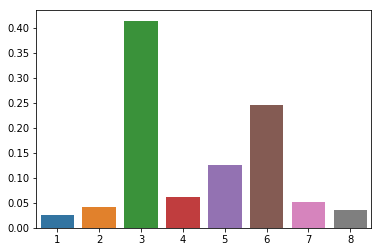

In [430]:
gb_model = GradientBoostingRegressor() # n_estimators=150
gb_model.fit(X_pcatrain, y_train)
y_pred = gb_model.predict(X_pcatest)
print("\n******** Gradient Boosting REGRESSION with PCA *******\n")
print(gb_model)
print("\nRoot Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nCoef for feature importances: ", gb_model.feature_importances_)
sns.barplot(x=list(range(1,9)), y=gb_model.feature_importances_)
print("\nTrain Score: ", gb_model.score(X_pcatrain, y_train))
print("Test Score: ", gb_model.score(X_pcatest, y_test))
      

gb_model_cv = GradientBoostingRegressor()
kfold = model_selection.KFold(n_splits=20, random_state=1)
cross_scores = model_selection.cross_val_score(gb_model_cv, Xpca6, y_scaled_df, cv=kfold, scoring='neg_mean_squared_error')
cross_scores_corrected = np.sqrt(-1 * cross_scores) 
print("\nCross Validation Score - RMSE: ", cross_scores_corrected.mean())


### Findings :

After making models from different Regression Algorithms, checking the RMSE and the train-test score, plus cross validations, it is found that Gradient Boosting Regressor gives the best results and is best suitable for this project.
Lets try to tune this model.

## 4. Deliverable -4 (Tuning the model)
a. Algorithms that you think will be suitable for this project
b. Techniques employed to squeeze that extra performance out of the
model without making it overfit or underfit
c. Model performance range at 95% confidence level

In [431]:
# split Train, Val, Test data for further model tuning

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_scaled_df, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [433]:
# selected Model - GradientBoost
# MODEL TUNING

gb_model_tune = GradientBoostingRegressor(n_estimators=500, alpha=0.95, loss='quantile', min_samples_leaf=9,min_samples_split=9 )
gb_model_tune.fit(X_train, y_train)
print(gb_model_tune)
print("\nTrain Score: ", gb_model_tune.score(X_train, y_train))

print("Val Score: ", gb_model_tune.score(X_val, y_val))

print("Test Score: ", gb_model_tune.score(X_test, y_test))

#kfold = model_selection.KFold(n_splits=20, random_state=1)
#cross_scores = model_selection.cross_val_score(gb_model_tune, X_scaled_df, y_scaled_df, cv=kfold, scoring='neg_mean_squared_error')
#cross_scores_corrected = np.sqrt(-1 * cross_scores) 
#print("\nCross Validation Score - RMSE: ", cross_scores_corrected.mean())



GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=9,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Train Score:  0.713076852038409
Val Score:  0.7285898025442601
Test Score:  0.7291424523555174


### 2 . c. Explore for gaussians. If data is likely to be a mix of gaussians,
explore individual clusters and present your findings in terms of
the independent attributes and their suitability to predict strength

In [434]:
# Found multiple Gaussians in the pairplot. Top two max. no of Gaussians found in the diagonal, 
# univariate analysis, are multiplied. 3 x 5 
# Create clusters with scaled dataset

In [435]:
from sklearn.cluster import KMeans

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(concrete_df_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7586.051920
2,3,6368.751485
3,4,5547.746110
4,5,4812.903962
5,6,4352.205362
6,7,4086.772026
7,8,3790.782323
8,9,3629.944772
9,10,3421.695174


In [436]:
# Identify the right number of clusters using the elbow plot

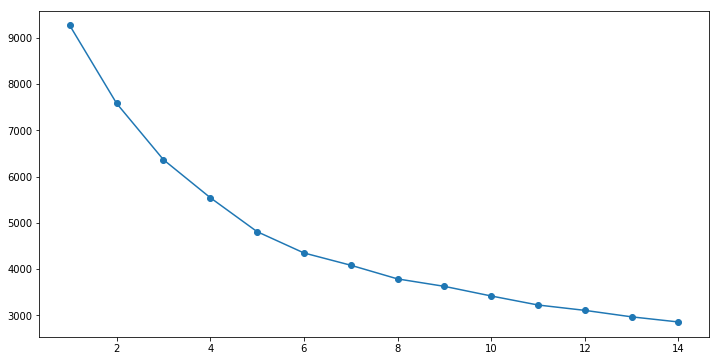

In [437]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [438]:
# We could see the bend at 5, so let us create 5 custers

kmeans = KMeans(n_clusters=5, n_init = 5, random_state=12345)
kmeans.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=12345, tol=0.0001, verbose=0)

In [439]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[205 195  62 234 334]


In [440]:
# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df_z) )
centroid_df.transpose()

,0,1,2,3,4
cement,1.022639,0.696896,0.600949,-0.820128,-0.571511
slag,0.428022,-0.832328,-0.165866,1.223499,-0.603160
ash,-0.394502,-0.808021,-0.847144,-0.369753,1.130186
water,-0.900583,0.460201,1.512734,0.611869,-0.425409
superplastic,1.069607,-0.989157,-1.039143,-0.453543,0.431653
coarseagg,-0.698237,0.603393,-0.082013,-0.284271,0.290662
fineagg,0.167104,-0.035593,-1.073985,-0.339596,0.355499
age,-0.186714,-0.251062,3.203097,-0.274589,-0.141032
strength,1.161747,-0.457520,0.551697,-0.481698,-0.210867


In [441]:
# Add cluster number to original cars data

predictions = kmeans.predict(concrete_df_z)
predictions
concrete_df_z["group"] = predictions
concrete_df_z['group'] = concrete_df_z['group'].astype('category')
concrete_df_z.dtypes

cement           float64
slag             float64
ash              float64
water            float64
superplastic     float64
coarseagg        float64
fineagg          float64
age              float64
strength         float64
group           category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCCE05CF98>,
      dtype=object)

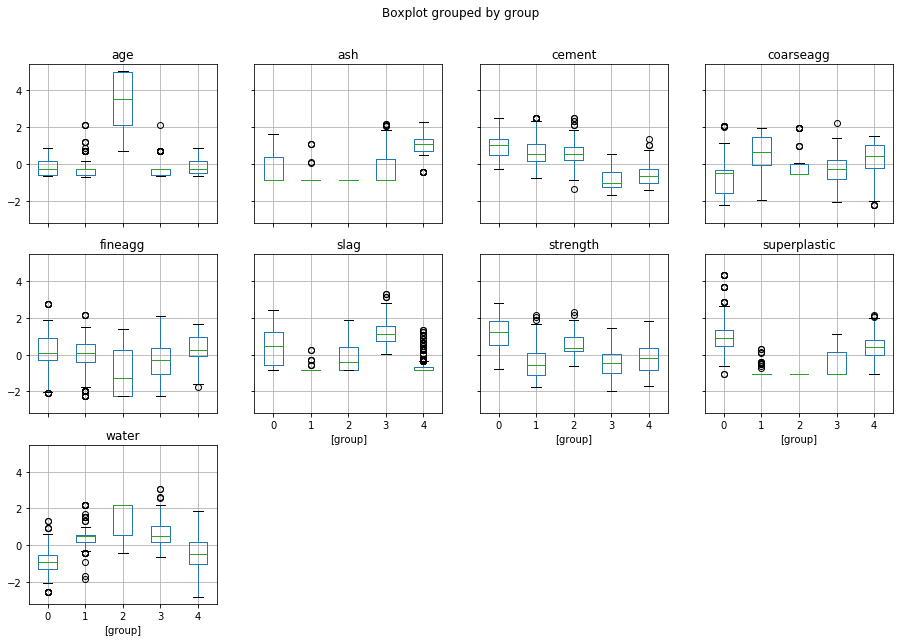

In [442]:
# Visualize the centers
concrete_df_z["group"] = predictions
concrete_df_z.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

### Findings
Group 0: is characterized by the group with ingredient proportions yielding highest strength. Has highest proportion of cement, superplastic and least amount of coarseagg and water.

Group 2: is characterized by , Highest age distribution, zero ash, cement is amlost similar in distribution as Group 0 and 1, thats more than others. Some least amount distributions of fineagg, zero superplastic but highest amount of water distribution. 

Group 0 and Group 2 : showcase high comprehensive strength when compared to rest of the groups 1,3, and 4.

Groups 1, 3 and 4 are almost similiar in strength.
Many outliers for slag in Group 1, 3 and 4
